In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast

from constants import numeric_columns as num_cols
from constants import *

#skewness
import scipy
from scipy.stats import skew

#MINMAX
from sklearn.preprocessing import MinMaxScaler

In [47]:
#importo df preprocessed
df_pp = pd.read_csv("pp_train.csv")

### Correlation matrix su dataset preprocessed

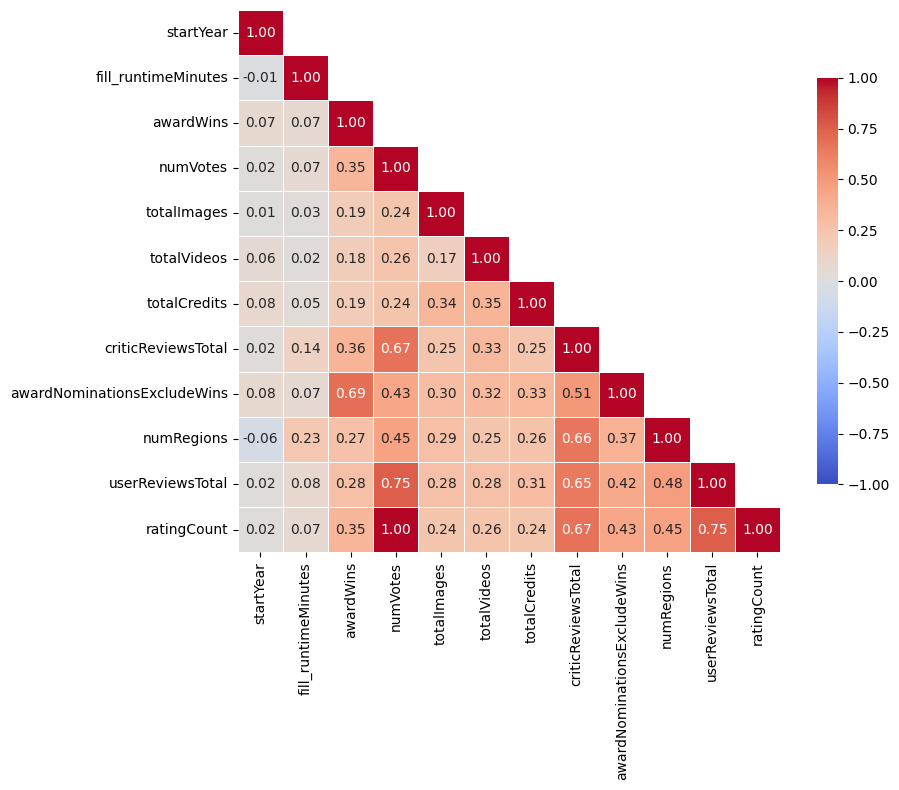

In [61]:
df_corr =  df_pp[['startYear', 'fill_runtimeMinutes', 'awardWins', 'numVotes', 'totalImages','totalVideos', 'totalCredits', 'criticReviewsTotal', 'awardNominationsExcludeWins', 'numRegions', 'userReviewsTotal','ratingCount']]
#correlation_matrix = sns.heatmap(df_corr.corr(method='pearson'), cmap="coolwarm", vmin=-1, vmax=1, annot=True)

correlation_matrix = df_corr.corr(method='pearson')

# Mascherare la parte inferiore della matrice (per mostrare solo metà)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Impostare la dimensione dei quadrati (aumentando la dimensione del grafico)
plt.figure(figsize=(10, 8))

# Creare la heatmap
sns.heatmap(correlation_matrix, 
            mask=mask,               # Mostrare solo metà della matrice
            cmap="coolwarm",         # Colormap (puoi cambiarla a tuo piacere)
            vmin=-1, vmax=1,         # Impostazioni del range dei valori
            annot=True,              # Aggiungere i numeri sopra ogni quadrato
            fmt=".2f",               # Formattare i numeri con due decimali
            annot_kws={"size": 10},  # Regola la dimensione dei numeri
            cbar_kws={'shrink': 0.75},  # Regola la lunghezza della barra dei colori
            square=True,             # Imposta i quadrati
            linewidths=0.5,          # Larghezza delle linee che separano i quadrati
            linecolor='white')       # Colore delle linee tra i quadrati

#insert_name
plt.savefig('plots/correlation_matrix.png', bbox_inches='tight', dpi=300)

# Visualizzare il grafico
plt.tight_layout()
plt.show()



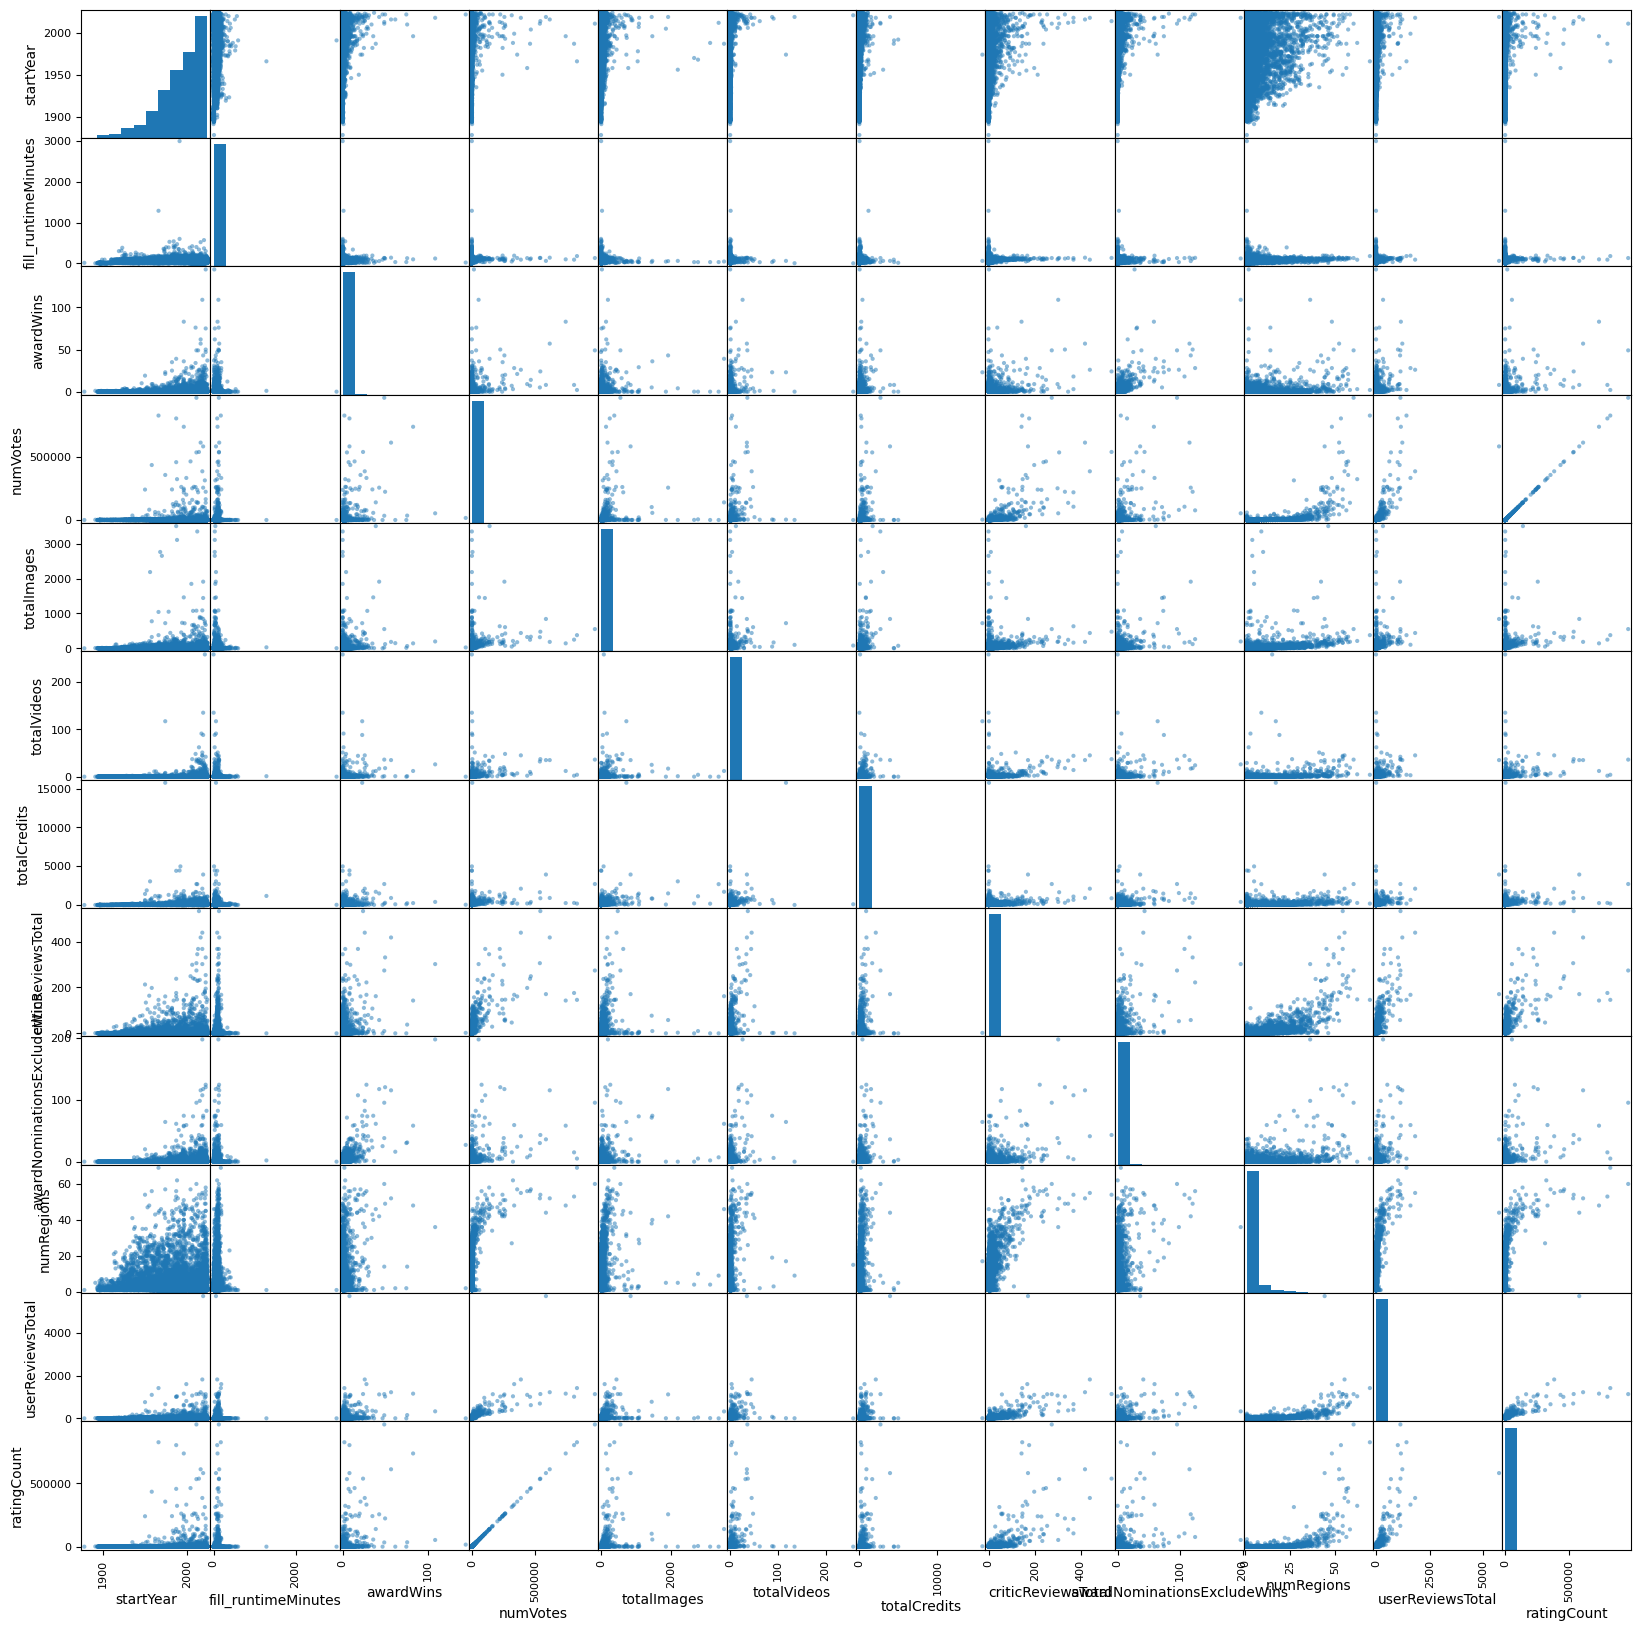

In [49]:
pd.plotting.scatter_matrix(df_corr, figsize=(20,20))
plt.show()

### Conto valori zero nel dataset

In [50]:
zero_counts = df_pp.apply(lambda col: (col == 0).sum())

print(zero_counts)

#awardWins sarebbero stati 11971 ma li abbiamo aggiunti

originalTitle                      0
rating                             0
startYear                          0
endYear                            0
runtimeMinutes                     1
awardWins                      14589
numVotes                           0
worstRating                        0
bestRating                         0
totalImages                     3290
totalVideos                    14821
totalCredits                     117
criticReviewsTotal             11439
titleType                          0
awardNominationsExcludeWins    14427
canHaveEpisodes                14832
isRatable                          0
isAdult                        16005
numRegions                         0
userReviewsTotal                9229
ratingCount                        0
countryOfOrigin                    0
is_Thriller                    15646
is_Family                      15205
is_Short                       13967
is_Sport                       16202
is_Biography                   16154
i

In [51]:
percentuale_zeri = df_pp.apply(lambda col: (col == 0).sum() / len(col) * 100)

print(percentuale_zeri)

originalTitle                   0.000000
rating                          0.000000
startYear                       0.000000
endYear                         0.000000
runtimeMinutes                  0.006086
awardWins                      88.789483
numVotes                        0.000000
worstRating                     0.000000
bestRating                      0.000000
totalImages                    20.023127
totalVideos                    90.201448
totalCredits                    0.712069
criticReviewsTotal             69.618404
titleType                       0.000000
awardNominationsExcludeWins    87.803542
canHaveEpisodes                90.268395
isRatable                       0.000000
isAdult                        97.407340
numRegions                      0.000000
userReviewsTotal               56.168219
ratingCount                     0.000000
countryOfOrigin                 0.000000
is_Thriller                    95.222445
is_Family                      92.538494
is_Short        

### Visualizzazione della distribuzione originale delle variabili numeriche

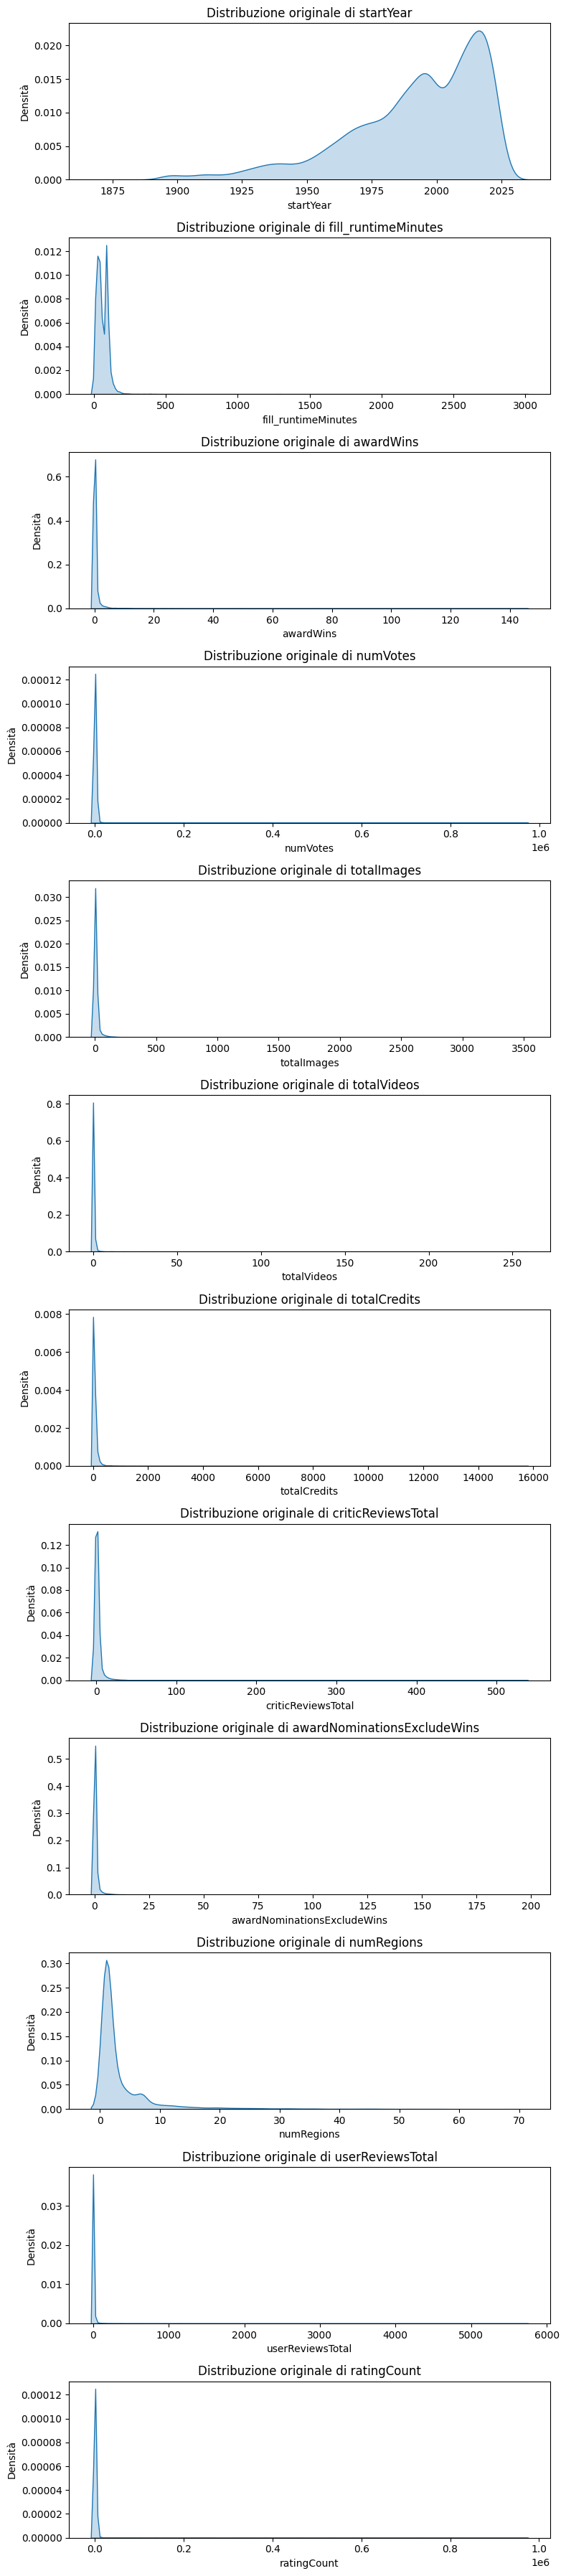

In [52]:
# Dataset di input
df_corr = df_pp[['startYear', 'fill_runtimeMinutes', 'awardWins', 'numVotes', 'totalImages',
                 'totalVideos', 'totalCredits', 'criticReviewsTotal', 
                 'awardNominationsExcludeWins', 'numRegions', 'userReviewsTotal', 'ratingCount']]

# 1. Visualizzare la distribuzione originale
fig, axes = plt.subplots(nrows=len(df_corr.columns), ncols=1, figsize=(8, len(df_corr.columns) * 3))

for col, ax in zip(df_corr.columns, axes):
    sns.kdeplot(data=df_corr, x=col, ax=ax, fill=True)
    ax.set_title(f'Distribuzione originale di {col}')
    ax.set_ylabel('Densità')

plt.tight_layout()
plt.show()

#### Applicare trasformazione log

In [53]:

# Calcolare la skewness per ogni colonna ignorando i valori nulli (per vedere su quali colonne può aver senso)
skewness = df_pp.apply(lambda col: skew(col[col != 0], nan_policy='omit') if col.dtypes != 'object' else None)
print(skewness)

originalTitle                        NaN
rating                         -0.623997
startYear                      -1.137049
endYear                        -0.747391
runtimeMinutes                 17.674093
awardWins                       8.853892
numVotes                       28.518758
worstRating                          NaN
bestRating                           NaN
totalImages                    25.840790
totalVideos                    16.046455
totalCredits                   50.328685
criticReviewsTotal              8.430024
titleType                            NaN
awardNominationsExcludeWins     8.519385
canHaveEpisodes                      NaN
isRatable                            NaN
isAdult                              NaN
numRegions                      4.181723
userReviewsTotal               31.089239
ratingCount                    28.518375
countryOfOrigin                      NaN
is_Thriller                          NaN
is_Family                            NaN
is_Short        

C:\Users\noemi\AppData\Local\Temp\ipykernel_5688\1067430613.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = df_pp.apply(lambda col: skew(col[col != 0], nan_policy='omit') if col.dtypes != 'object' else None)


In [54]:
# Applicare il logaritmo a tutte le colonne con alta skewness (>10) dei valori diversi da zero
columns_to_transform = ['fill_runtimeMinutes', 'numVotes', 'totalImages', 
                        'totalVideos', 'totalCredits', 'userReviewsTotal', 'ratingCount']

# Applicare la trasformazione logaritmica
df_transformed = df_pp.copy()
df_transformed[columns_to_transform] = df_pp[columns_to_transform].apply(lambda col: np.log1p(col))

In [55]:
# Ricalcolare la skewness -> questa volta considera anche i valori nulli -> calcola quella totale
new_skewness = df_transformed.apply(lambda col: skew(col, nan_policy='omit') if col.dtypes != 'object' else None)

print(new_skewness)

originalTitle                        NaN
rating                         -0.623997
startYear                      -1.137049
endYear                        -0.747391
runtimeMinutes                 17.671860
awardWins                      22.721546
numVotes                        1.302544
worstRating                          NaN
bestRating                           NaN
totalImages                     1.285189
totalVideos                     5.465202
totalCredits                   -0.200615
criticReviewsTotal             14.776187
titleType                            NaN
awardNominationsExcludeWins    22.067634
canHaveEpisodes                 2.717279
isRatable                            NaN
isAdult                         5.966325
numRegions                      4.181723
userReviewsTotal                2.052703
ratingCount                     1.302397
countryOfOrigin                      NaN
is_Thriller                     4.240446
is_Family                       3.237708
is_Short        

C:\Users\noemi\AppData\Local\Temp\ipykernel_5688\1453300317.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  new_skewness = df_transformed.apply(lambda col: skew(col, nan_policy='omit') if col.dtypes != 'object' else None)


In [56]:
#visualizzazione distribuzione post trasformazione lOgaritmica

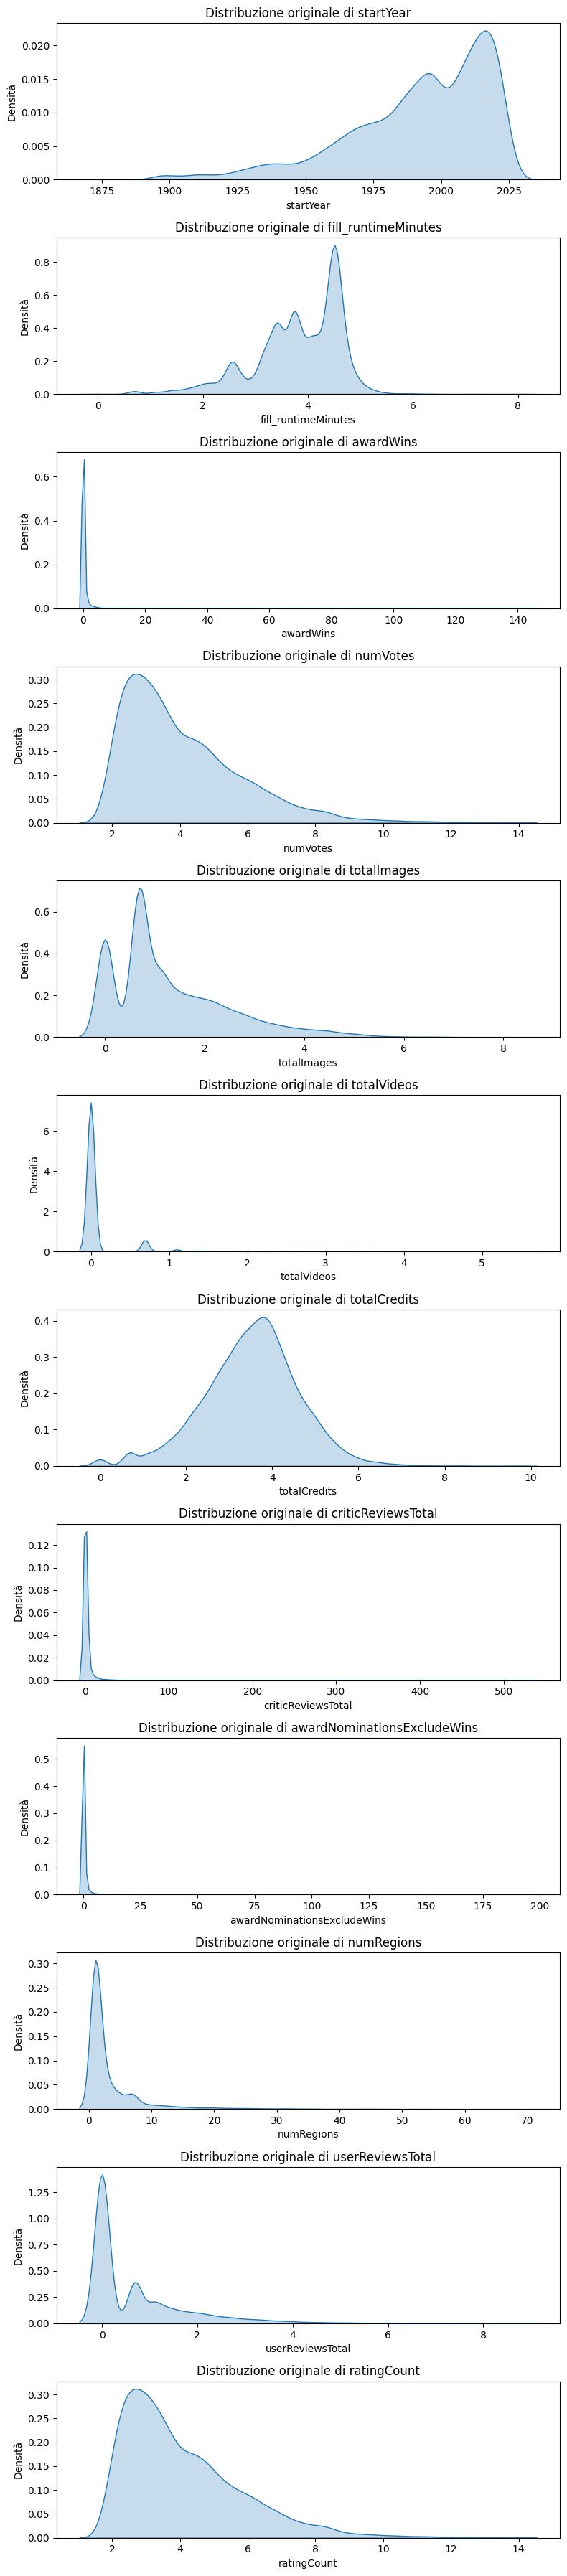

In [57]:
df_num_trans = df_transformed[['startYear', 'fill_runtimeMinutes', 'awardWins', 'numVotes', 'totalImages',
                 'totalVideos', 'totalCredits', 'criticReviewsTotal', 
                 'awardNominationsExcludeWins', 'numRegions', 'userReviewsTotal', 'ratingCount']]

# 1. Visualizzare la distribuzione originale
fig, axes = plt.subplots(nrows=len(df_num_trans.columns), ncols=1, figsize=(8, len(df_num_trans.columns) * 3))

for col, ax in zip(df_num_trans.columns, axes):
    sns.kdeplot(data=df_num_trans, x=col, ax=ax, fill=True)
    ax.set_title(f'Distribuzione originale di {col}')
    ax.set_ylabel('Densità')

plt.tight_layout()
plt.show()

In [58]:
# Dataset di input
df_corr = df_pp[['startYear', 'fill_runtimeMinutes', 'awardWins', 'numVotes', 'totalImages',
                 'totalVideos', 'totalCredits', 'criticReviewsTotal', 
                 'awardNominationsExcludeWins', 'numRegions', 'userReviewsTotal', 'ratingCount']]


In [59]:

# 2. Applicare il Min-Max Scaling
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_corr), columns=df_corr.columns)

# 3. Visualizzare la distribuzione dopo il Min-Max Scaling
#non ha senso perchè con minMax non cambia